In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def is_cv2():
    # if we are using OpenCV 2, then our cv2.__version__ will start
    # with '2.'
    return check_opencv_version("2.")

def is_cv3():
    # if we are using OpenCV 3.X, then our cv2.__version__ will start
    # with '3.'
    return check_opencv_version("3.")

def check_opencv_version(major, lib=None):
    # if the supplied library is None, import OpenCV
    if lib is None:
        import cv2 as lib

    # return whether or not the current OpenCV version matches the
    # major version number
    return lib.__version__.startswith(major)


Ok we going to define a few function here

In [2]:
def convexHullIsPointingUp(hull):
    x, y, w, h = cv2.boundingRect(hull)

    aspectRatio = float(w) / h
    if aspectRatio > 0.9:
        return False

    listOfPointsAboveCenter = []
    listOfPointsBelowCenter = []

    intYcenter = y + h / 2

    # step through all points in convex hull
    for point in hull:
        # and add each point to
        # list of points above or below vertical center as applicable
        if point[0][1] < intYcenter:
            listOfPointsAboveCenter.append(point)

        if point[0][1] >= intYcenter:
            listOfPointsBelowCenter.append(point)

    intLeftMostPointBelowCenter = listOfPointsBelowCenter[0][0][0]
    intRightMostPointBelowCenter = listOfPointsBelowCenter[0][0][0]

    # determine left most point below center
    for point in listOfPointsBelowCenter:

            if point[0][0] < intLeftMostPointBelowCenter:
                intLeftMostPointBelowCenter = point[0][0]

        # determine right most point below center
    for point in listOfPointsBelowCenter:
        if point[0][0] >= intRightMostPointBelowCenter:
            intRightMostPointBelowCenter = point[0][0]

        # step through all points above center
    for point in listOfPointsAboveCenter:
        if point[0][0] < intLeftMostPointBelowCenter or \
         point[0][0] > intRightMostPointBelowCenter:
            return False

    # if we get here, shape has passed pointing up check
    return True

In [3]:
def testcone(img, file=''):
    print ('Image shape ', img.shape)
    #cv2.imshow('image', img)
    #plt.show()
    # convert to HSV color space, this will produce better color filtering
    imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Threshold on low range of HSV red
    low_redl = np.array([0, 135, 135])
    low_redh = np.array([15, 255, 255])
    imgThreshLow = cv2.inRange(imgHSV, low_redl, low_redh)

    # threshold on high range of HSV red
    high_redl = np.array([159, 135, 135])
    high_redh = np.array([179, 255, 255])
    imgThreshHigh = cv2.inRange(imgHSV, high_redl, high_redh)

    # combine low range red thresh and high range red thresh
    imgThresh = cv2.bitwise_or(imgThreshLow, imgThreshHigh)

    # clone/copy thresh image before smoothing
    imgThreshSmoothed = imgThresh.copy()
    # open image (erode, then dilate)
    kernel = np.ones((3, 3), np.uint8)
    imgThreshSmoothed = cv2.erode(imgThresh, kernel, iterations=1)
    imgThreshSmoothed = cv2.dilate(imgThreshSmoothed, kernel, iterations=1)
    # Gaussian blur
    imgThreshSmoothed = cv2.GaussianBlur(imgThreshSmoothed, (5, 5), 0)
    #cv2.imshow('imgThreshSmoothed ', imgThreshSmoothed)
    # get Canny edges

    imgCanny = cv2.Canny(imgThreshSmoothed, 160, 80)
    #cv2.imshow('imgCanny ', imgCanny)
    if is_cv2():
        contours, hierarchy = cv2.findContours(imgCanny,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    else:
        image, contours, hierarchy = cv2.findContours(imgCanny,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

    listOfContours = []
    if len(contours) != 0:
        for cnt in contours:

            # epsilon = 0.1 * cv2.arcLength(cnt, True)
            # print'epsilon',epsilon
            listOfContours.append(cv2.approxPolyDP(cnt, 6.7, True))

    # print file + ' listOfContours ' , len(listOfContours)

    listOfCones = []
    for contour in listOfContours:
            hull = cv2.convexHull(contour)
            # print 'convexHull',len(temp)
            if (len(hull) >= 3 and convexHullIsPointingUp(hull)):
                listOfCones.append(hull)
                #imghull2 = cv2.drawContours(img.copy(), hull, 1, (0, 0, 255), 5)
                # draw hull on image???
                # print '--hull',len(hull)    #hull.append(temp)
           
    #if is_cv2():
    imghull = img.copy()
    cv2.drawContours(imghull, listOfCones, -1, (0, 255, 0), 3)
    #else:
    #    imghull = cv2.drawContours(img.copy, listOfCones, -1, (0, 255, 0), 3)
    
    #cv2.imshow('hull ', imghull)
    # cv2.imshow('hull 2',imghull2)
    #show what going on
    #plt.axis("off")
    #show what going on
    plt.figure()
    # Show the first image on the left column
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(imghull, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    # remove any inner overlapping cones

    print ('Found ', len(listOfCones), ' Cones')

    return

Processing file ../images\1.jpg
('Image shape ', (960L, 1280L, 3L))


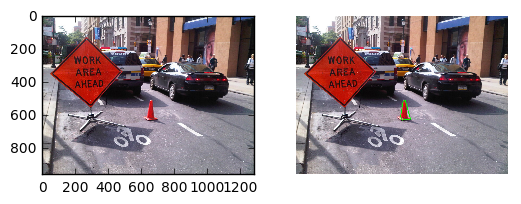

('Found ', 1, ' Cones')
Done Processing file ../images\1.jpg
Processing file ../images\10.jpg
('Image shape ', (1080L, 1440L, 3L))


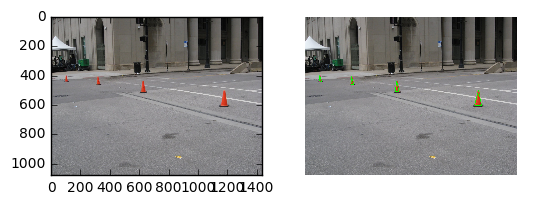

('Found ', 4, ' Cones')
Done Processing file ../images\10.jpg
Processing file ../images\11.jpg
('Image shape ', (565L, 850L, 3L))


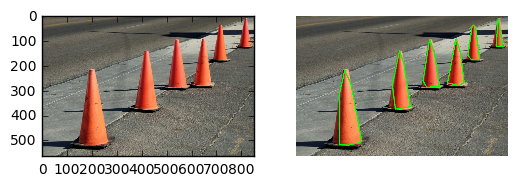

('Found ', 6, ' Cones')
Done Processing file ../images\11.jpg
Processing file ../images\12.jpg
('Image shape ', (935L, 1034L, 3L))


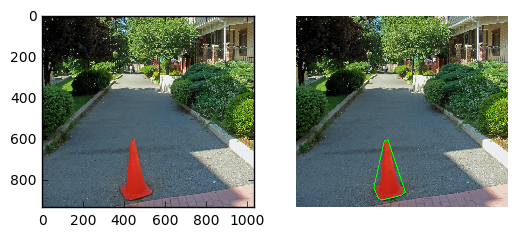

('Found ', 1, ' Cones')
Done Processing file ../images\12.jpg
Processing file ../images\13.JPG
('Image shape ', (960L, 1280L, 3L))


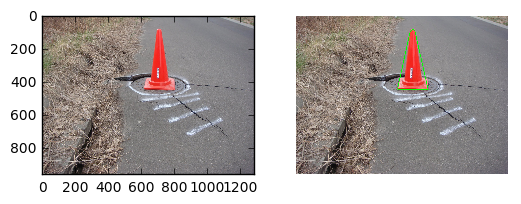

('Found ', 1, ' Cones')
Done Processing file ../images\13.JPG
Processing file ../images\14.jpg
('Image shape ', (400L, 400L, 3L))


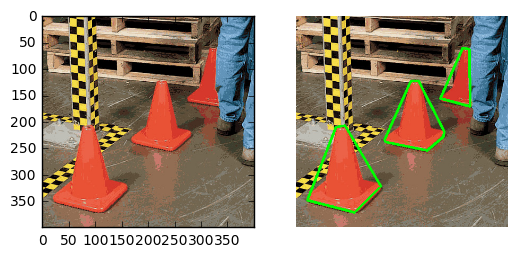

('Found ', 3, ' Cones')
Done Processing file ../images\14.jpg
Processing file ../images\2.jpg
('Image shape ', (750L, 681L, 3L))


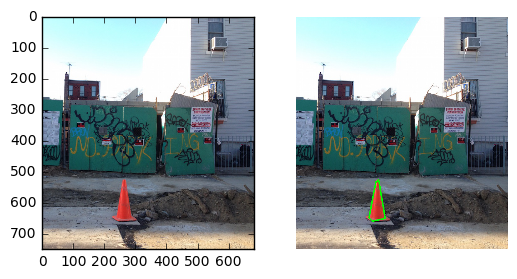

('Found ', 1, ' Cones')
Done Processing file ../images\2.jpg
Processing file ../images\3.jpg
('Image shape ', (667L, 1000L, 3L))


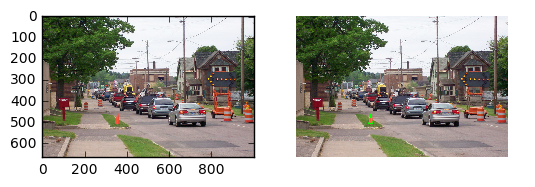

('Found ', 1, ' Cones')
Done Processing file ../images\3.jpg
Processing file ../images\4.jpg
('Image shape ', (980L, 1306L, 3L))


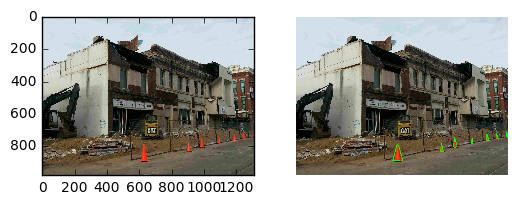

('Found ', 7, ' Cones')
Done Processing file ../images\4.jpg
Processing file ../images\5.jpg
('Image shape ', (600L, 745L, 3L))


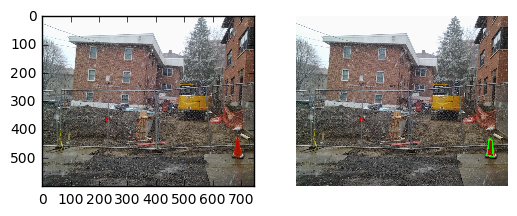

('Found ', 1, ' Cones')
Done Processing file ../images\5.jpg
Processing file ../images\6.jpg
('Image shape ', (532L, 757L, 3L))


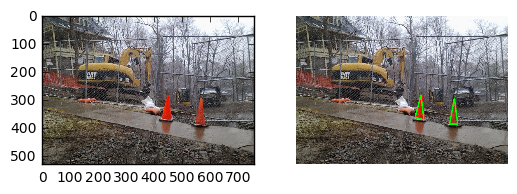

('Found ', 2, ' Cones')
Done Processing file ../images\6.jpg
Processing file ../images\7.jpg
('Image shape ', (969L, 1412L, 3L))


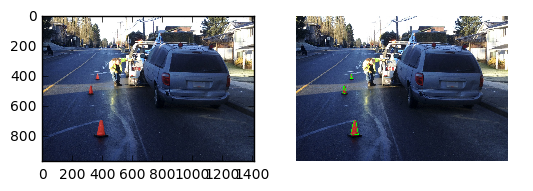

('Found ', 3, ' Cones')
Done Processing file ../images\7.jpg
Processing file ../images\8.jpg
('Image shape ', (989L, 1318L, 3L))


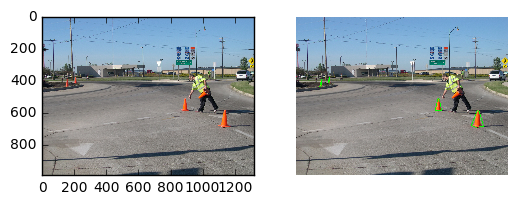

('Found ', 4, ' Cones')
Done Processing file ../images\8.jpg
Processing file ../images\9.jpg
('Image shape ', (667L, 1000L, 3L))


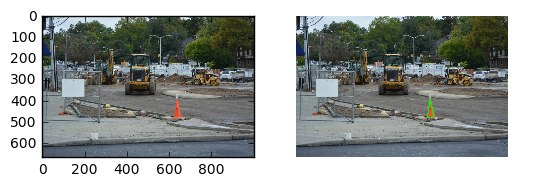

('Found ', 1, ' Cones')
Done Processing file ../images\9.jpg
Processing file ../images\g1.jpg
('Image shape ', (195L, 259L, 3L))


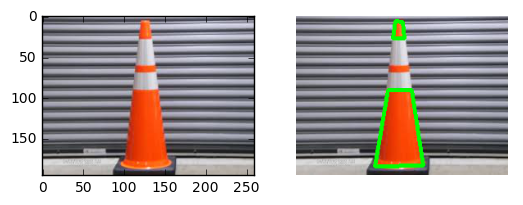

('Found ', 2, ' Cones')
Done Processing file ../images\g1.jpg
Processing file ../images\g2.jpg
('Image shape ', (187L, 270L, 3L))


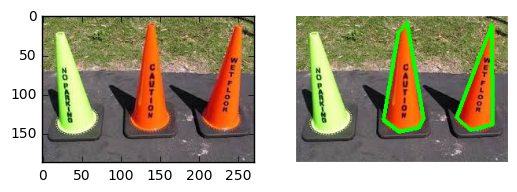

('Found ', 2, ' Cones')
Done Processing file ../images\g2.jpg
Processing file ../images\g3.jpg
('Image shape ', (196L, 257L, 3L))


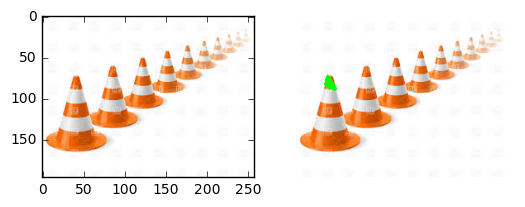

('Found ', 1, ' Cones')
Done Processing file ../images\g3.jpg
Processing file ../images\g4.jpg
('Image shape ', (243L, 208L, 3L))


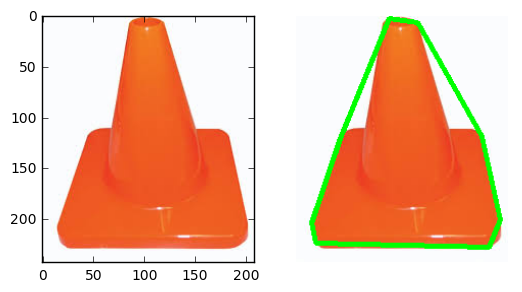

('Found ', 1, ' Cones')
Done Processing file ../images\g4.jpg
Processing file ../images\g5.jpg
('Image shape ', (177L, 285L, 3L))


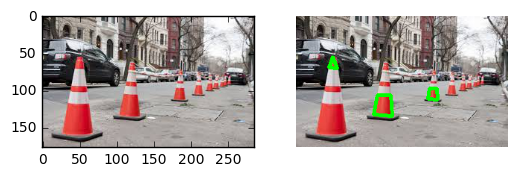

('Found ', 3, ' Cones')
Done Processing file ../images\g5.jpg
Processing file ../images\g6.jpg
('Image shape ', (174L, 290L, 3L))


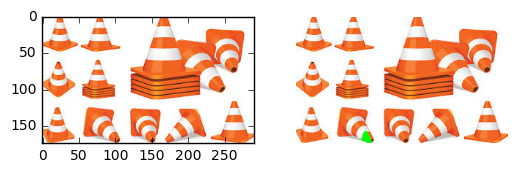

('Found ', 1, ' Cones')
Done Processing file ../images\g6.jpg
Processing file ../images\IMG_1053.JPG
('Image shape ', (3024L, 4032L, 3L))


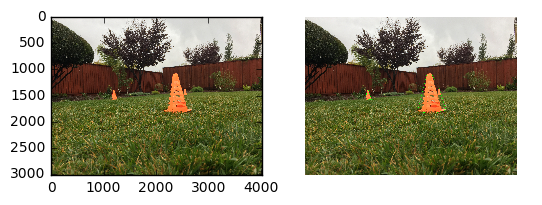

('Found ', 2, ' Cones')
Done Processing file ../images\IMG_1053.JPG
Processing file ../images\IMG_1054.JPG
('Image shape ', (3024L, 4032L, 3L))


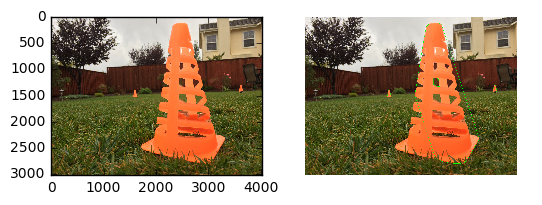

('Found ', 4, ' Cones')
Done Processing file ../images\IMG_1054.JPG
Processing file ../images\IMG_1055.JPG
('Image shape ', (3024L, 4032L, 3L))


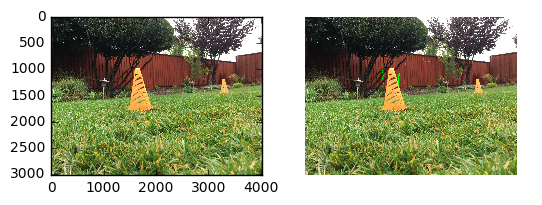

('Found ', 19, ' Cones')
Done Processing file ../images\IMG_1055.JPG
Processing file ../images\IMG_1057.JPG
('Image shape ', (3024L, 4032L, 3L))


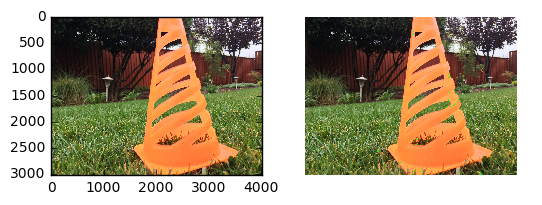

('Found ', 14, ' Cones')
Done Processing file ../images\IMG_1057.JPG
Processing file ../images\IMG_1058.JPG
('Image shape ', (3024L, 4032L, 3L))


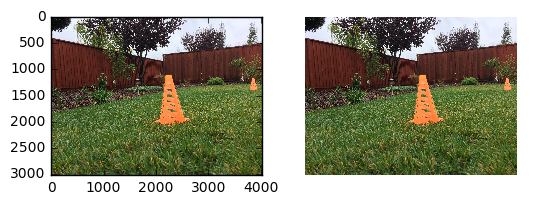

('Found ', 1, ' Cones')
Done Processing file ../images\IMG_1058.JPG
Processing file ../images\IMG_1059.JPG
('Image shape ', (3024L, 4032L, 3L))


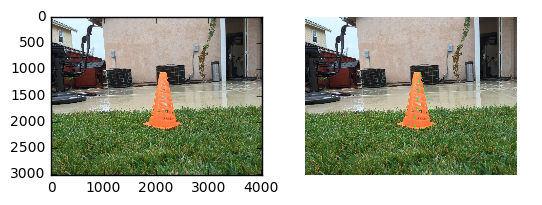

('Found ', 3, ' Cones')
Done Processing file ../images\IMG_1059.JPG
Processing file ../images\MATT_ROSS_N70AR_OUTSIDE_LR.jpg
('Image shape ', (919L, 1200L, 3L))


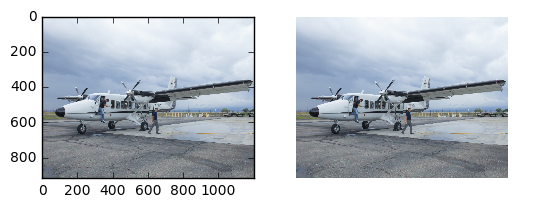

('Found ', 0, ' Cones')
Done Processing file ../images\MATT_ROSS_N70AR_OUTSIDE_LR.jpg


In [4]:
import glob
# get the files
files = glob.glob('../images/*.jpg')
#files.extend(glob.glob('..\images\*.png'))
#print(files)

for file in files:
    print ('Processing file ' + file)
    testcone(cv2.imread(file, -1), file=file)
    print ('Done Processing file ' + file)


In [ ]:
# Change the number based on what camera you have. 0 is the default camera
cap = cv2.VideoCapture(1)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    #cv2.cvtColor(frame, gray, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',frame)
    testcone(frame)
    if cv2.waitKey(1) != -1:
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
